<a href="https://colab.research.google.com/github/vatstechnologies/AI-CHATBOT-IMAGE-GENERATOR/blob/main/Dog_Vs_Cat_Classification_(DL_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 107MB/s] 
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

In [8]:
# geneartors
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
# create a CNN model
model = Sequential()

model.add(Conv2D(32 , kernel_size = (3,3) , padding = 'valid' , activation = 'relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(64 , kernel_size = (3,3) , padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(128 , kernel_size = (3,3) , padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2 , padding = 'valid'))

model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation = 'sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [25]:
history = model.fit(train_ds , epochs = 10 , validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8992 - loss: 0.2030 - val_accuracy: 0.8006 - val_loss: 0.5685
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9108 - loss: 0.1846 - val_accuracy: 0.7334 - val_loss: 1.0957
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9195 - loss: 0.1695 - val_accuracy: 0.7974 - val_loss: 0.7501
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9255 - loss: 0.1528 - val_accuracy: 0.8006 - val_loss: 0.8579
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9344 - loss: 0.1369 - val_accuracy: 0.8146 - val_loss: 0.6745
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.9450 - loss: 0.1163 - val_accuracy: 0.8186 - val_loss: 0.8182
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.9454 - loss: 0.1159 - val_accuracy: 0.8184 - val_loss: 0.6165
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9540 - loss: 0.1038 - 

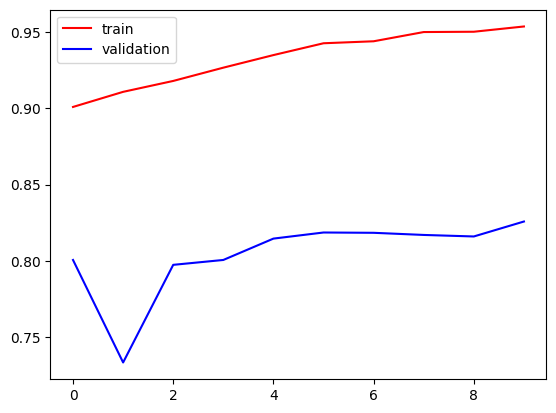

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red' , label= 'train')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'validation')
plt.legend()
plt.show()

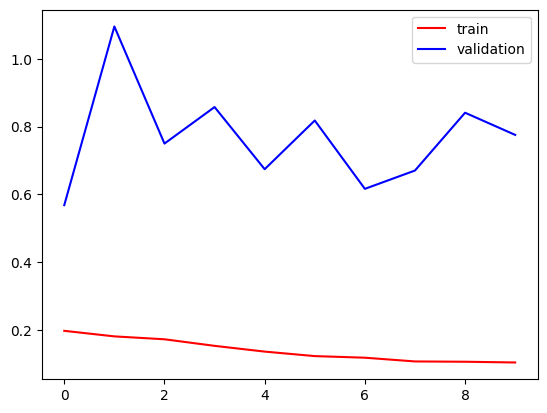

In [28]:
plt.plot(history.history['loss'], color= 'red' , label= 'train')
plt.plot(history.history['val_loss'] , color = 'blue' , label = 'validation')
plt.legend()
plt.show()

Ways To Reduce Overfitting

* Add More Data
* Data Augmentation -> Next Video
* L1 / L2 Regularizer
* Dropout
* Batch Norm
* Reduce Complexity

In [26]:
import cv2

In [29]:
test_img = cv2.imread('/content/bernese-mountain-dog-7928156_1280.jpg')

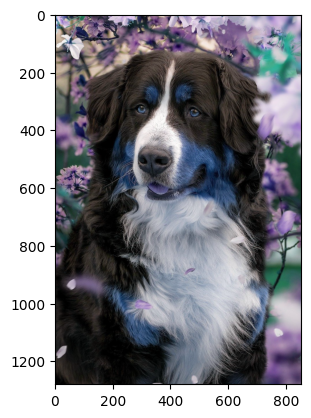

In [30]:
plt.imshow(test_img)
plt.show()

In [31]:
test_img.shape

(1280, 853, 3)

In [32]:
test_img = cv2.resize(test_img , (256,256))

In [33]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
model.predict(  test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [35]:
test_img = cv2.imread('/content/cat-8451431_1280.jpg')

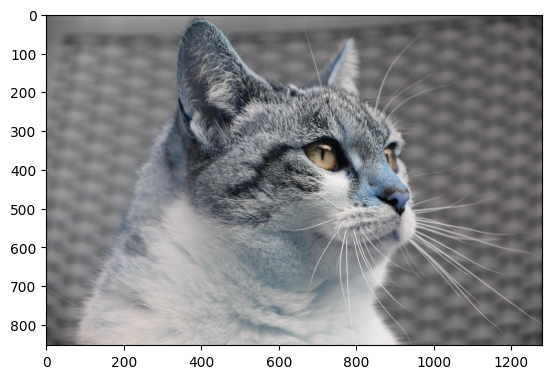

In [36]:
plt.imshow(test_img)
plt.show()

In [37]:
test_img.shape

(853, 1280, 3)

In [38]:
test_img = cv2.resize(test_img , (256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [41]:
model.predict(  test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)